Tenemos que calcular $E\left[\hat{f}(x)\right]$. Vamos primero a expresar el núcleo de otra manera. Tenemos que tratar con $ K\left( \frac{x - X_i}{h}\right)$, siendo $K$ la función indicadora en el intervalo $(-1/2,1/2)$.  Podemos ver entonces que 
$$
 K\left( \frac{x - X_i}{h}\right) = \mathbb I_{(-1/2,1/2)} \left( \frac{x - X_i}{h}\right) = 
 \begin{cases}
 1 & \left| \frac{x - X_i}{h} \right| < \frac{1}{2}\\
 0 & \text{else}
 \end{cases}
$$
Por lo que, si despejamos del miembro superior de la última igualdad, obtenemos que esta función será $1$ cuando:
$$
-\frac{h}{2} < x - X_i < \frac{h}{2} \Longleftrightarrow x - \frac{h}{2} < \lvert X_i \rvert <  x +\frac{h}{2} 
$$

Vemos que
\begin{align*}
E\left[\hat{f}(x)\right] & = E \left[ \frac{1}{nh} \sum K\left( \frac{x - X_i}{h}\right)\right]\\
 & = \frac{1}{nh}  \sum  E \left[  K\left( \frac{X_i - t}{h}\right) \right] \\
 &= \frac{1}{nh}  \sum \int  K\left( \frac{X_i - t}{h}\right) f(t) dt \\
 & = \frac{1}{nh} \sum \int_{-\frac{h}{2} - x}^{\frac{h}{2}  + x} f(t) dt\\
 & =  \frac{1}{nh} \sum  P\left(x -\frac{h}{2}  \leq X_i \leq x + \frac{h}{2}\right)
\end{align*}
Ahora, como estas probabilidades son la misma para cualquiera de las $X_i$ y sabiendo que los miembros de la sumatoria son la definición de la función de distribución, podemos escribir eso como:
$$
E\left[\hat{f}(x)\right] = \frac{F(x + \frac{h}{2}) - F(x -\frac{h}{2})}{h}
$$

Con esto, podemos decir que
$$
Bias(\hat{f}(x)) = E\left[\hat{f}(x)\right] - f(x) = \frac{F(x + \frac{h}{2}) - F(x -\frac{h}{2})}{h} - f(x)
$$

Vamos a calcular ahora la varianza de $\hat{f}(x)$. Sabemos que
$$
Var(\hat{f}(x)) = Var(\frac{1}{nh} \sum K\left( \frac{x - X_i}{h}\right)) = \frac{1}{n^2 h^2} \sum Var\left(K\left( \frac{x - X_i}{h}\right)\right) = \frac{n}{n^2 h^2} Var\left(K\left( \frac{x - X_i}{h}\right)\right)
$$
Donde, en la última igualdad hemos usado que la varianza para todas las variables es la misma pues siguen la misma $f$. Calculemos entonces $Var\left(K\left( \frac{x - X_i}{h}\right)\right)$.
$$
Var\left(K\left( \frac{x - X_i}{h}\right)\right) = E\left[K\left( \frac{x - X_i}{h}\right)^2\right] - E\left[K\left( \frac{x - X_i}{h}\right)\right]^2
$$
Pero, sabemos que al ser una función indicadora, $K(x)^2 = K(x)$, por lo que tenemos (usando lo que hemos calculado en el ejercicio anterior):
\begin{align*}
Var\left(K\left( \frac{x - X_i}{h}\right)\right) & = E\left[K\left( \frac{x - X_i}{h}\right)\right] - E\left[K\left( \frac{x - X_i}{h}\right)\right]^2 \\
& = P\left(x -\frac{h}{2}  \leq X_i \leq x + \frac{h}{2}\right) - P\left(x -\frac{h}{2}  \leq X_i \leq x + \frac{h}{2}\right)^2\\
& = F(x + \frac{h}{2}) - F(x -\frac{h}{2})  \left(1 - \left(F(x + \frac{h}{2}) - F(x -\frac{h}{2})\right)\right)
\end{align*}
Por lo que 
$$
Var(\hat{f}(x)) = \frac{F(x + \frac{h}{2}) - F(x -\frac{h}{2})  \left(1 - \left(F(x + \frac{h}{2}) - F(x -\frac{h}{2})\right)\right)}{n h^2}
$$


In [2]:

library(tidyverse)
library(reshape2)

-- Attaching packages ------------------------------------------------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.5     v purrr   0.3.4
v tibble  3.1.5     v dplyr   1.0.7
v tidyr   1.1.4     v stringr 1.4.0
v readr   2.0.2     v forcats 0.5.1

-- Conflicts ---------------------------------------------------------------------------------- tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


Attaching package: 'reshape2'


The following object is masked from 'package:tidyr':

    smiths




In [3]:
alpha <- 3
beta <- 6

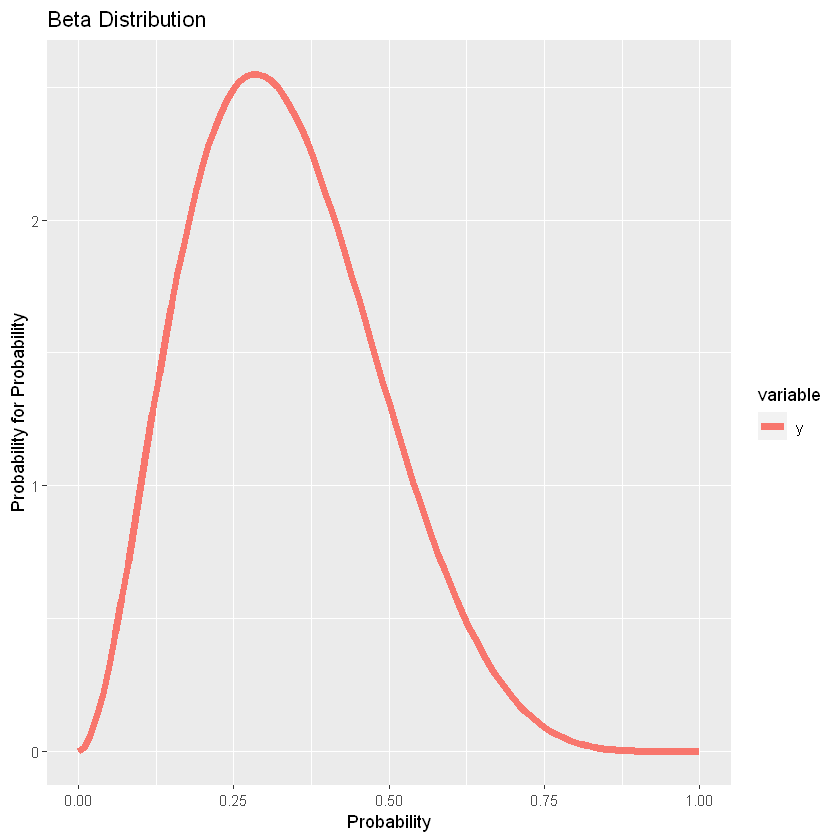

In [4]:
x <- seq(0, 1, 0.01) 
beta_dist <- data.frame(x = x, y = dbeta(x,shape1=alpha,shape2=beta))
beta_melt <- melt(beta_dist,x)
g <- ggplot(beta_melt, aes(x,value, color=variable))
g+geom_line(size=2) + labs(title="Beta Distribution") + labs(x="Probability", y="Probability for Probability")

In [5]:
rkernel <- function(n, data, h){
  # genera n observaciones de una distribución correspondiente a un estimador
  # del núcleo (calculado con 'muestra') con núcleo gaussiano y parámetro de suavizado h
  y = sample(data, n, rep = TRUE) + rnorm(n, sd = h)
  return(y)
}

In [6]:
n <- 20
sample <- rbeta(n,alpha,beta)
kernel_estimator <- density(sample)
h <- kernel_estimator$bw
kernel_data <- rkernel(n, sample, h)

Warning message:
"Removed 15 row(s) containing missing values (geom_path)."


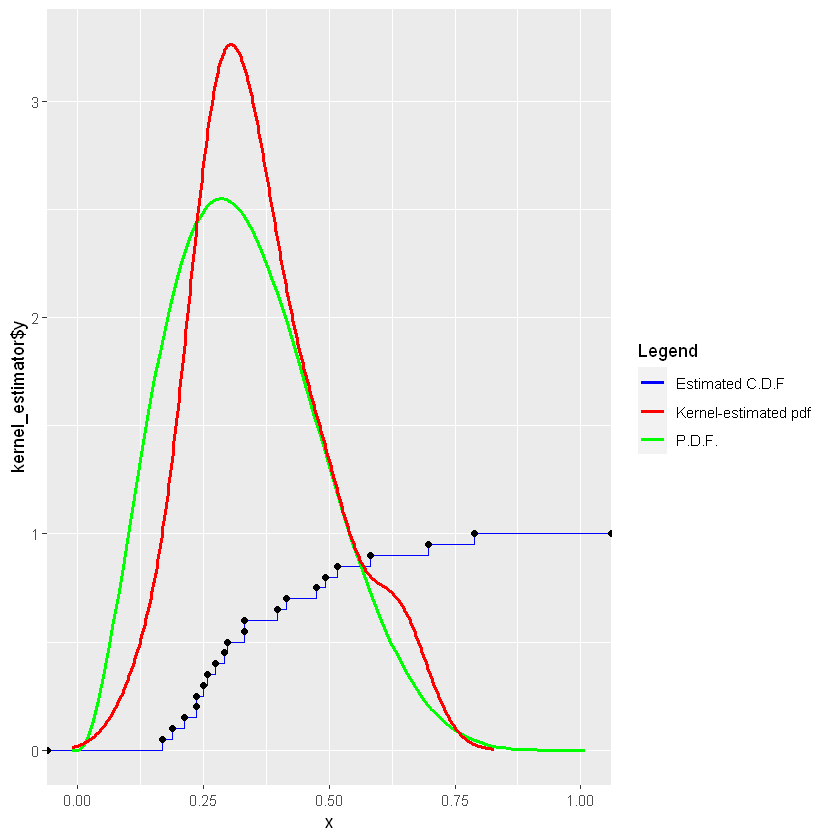

In [18]:

sample  <- data.frame(x = rbeta(n,alpha,beta))

data <- data.frame( x = sample)

ggplot(NULL) +
    stat_ecdf(data = data,aes(x,colour="Estimated C.D.F")) +
    stat_ecdf(data = data,aes(x), geom = 'point') +
    stat_function(fun=dbeta,aes(colour='P.D.F.'),args=list(shape1=alpha,shape2=beta),size=1)+
    geom_line(aes(x=kernel_estimator$x,y=kernel_estimator$y,colour="Kernel-estimated pdf"),size=1)+
    scale_color_manual("Legend",values=c("blue","red","green"))+
    xlim(-0.01,1.01)
    

In [15]:
num_experiments <- 200
experiment_size <- 20
all_samples <- rbeta(num_experiments*experiment_size,alpha,beta)
kernel_estimator <- density(all_samples)
errors_f <- rep(NA,num_experiments)
errors_F <- rep(NA,num_experiments)
for (i in 0:num_experiments){
    sample <- rbeta(experiment_size,alpha,beta)
    kernel_estimator <- density(sample)
    
    
    h <- kernel_estimator$bw
    kernel_data <- rkernel(n, sample, h)
    
    errors_f[i+1] <- ks.test(kernel_estimator$x, "pbeta",alpha,beta)$statistic
    errors_F[i+1] <- ks.test(sample,"dbeta",alpha,beta)$statistic

}


In [16]:
summary(errors_f)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.1103  0.2053  0.2328  0.2353  0.2619  0.3575 

In [17]:
summary(errors_F)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.831   2.129   2.195   2.199   2.277   2.449 